# [Project 3] A/B 테스트
- Data 출처: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data


In [6]:
import warnings
warnings.filterwarnings('ignore')

## 1) 데이터 불러오기

In [1]:
!git clone https://github.com/citydataviz/FastCampus.git

Cloning into 'FastCampus'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 104 (delta 50), reused 55 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 14.28 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [1]:
import pandas as pd
df = pd.read_csv('/content/FastCampus/Part5/marketing_ab-test.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# 2) 데이터 사전
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

# 3) 데이터 유형 확인 및 데이터 이해
- ydata profiling 라이브러리 활용

In [3]:
# prompt: ydata profiling 설치 후 실행해줘

!pip install ydata-profiling

import pandas as pd
from ydata_profiling import ProfileReport

# Assuming df is already defined from the previous code block
# If not, uncomment the lines below to load the CSV
# !git clone https://github.com/citydataviz/FastCampus.git
# df = pd.read_csv('/content/FastCampus/Part5/marketing_ab-test.csv')

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()
# Or to generate a HTML file:
#profile.to_file("your_report.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5badc4739f4726ab4ec4ccb5b1f0979d670a000238c161d4eb10b9f053bed506
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:528: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 4) 사용하지 않는 열 삭제
- Unnamed: 0, most ads hour

In [13]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


In [5]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


## 5) 열 이름 변경

In [2]:
df['converted'] = df['converted'].astype(int)
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


## 6) 중복 행 삭제, 결측치 처리, 이상치 처리

## 7-1 ) 가설검정 1 "광고 효과가 있는가?"
- control(공익 광고 = psa) 과 test(실제 광고 = ad) 그룹 구분
- two sample t-test 활용


In [3]:
from scipy import stats

# Test Group Analysis
control_group = df[df['test group'] == 'psa']
test_group = df[df['test group'] == 'ad']

t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value: {p_val}")

Test Group Analysis - T-statistic: 7.37040597428566, P-value: 1.7033052627831264e-13


In [9]:
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the 'ad' and 'psa' groups.")

Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.


## 7-2) 가설검정 2 "요일별로 광고를 가장 많이 본 사람들이 전환율(구매로 전환된 비율)에서 차이를 보이는가? "
- 테스트 그룹 중에서 요일별로 그룹 생성
- 정규성 (shapiro), 등분산성(levene) 테스트
- 정규성,등분산성 만족할 경우 -> ANOVA
- 정규성, 등분산성 만족하지 않을 경우 -> Kruskal-Wallis 검정

- 효과적이고, 효과적이지 않은 요일을 구별해낼 수 있는가?

(정규성, 등분산성, 독립성 만족시 -> Tukey's HSD 사용)

- 정규성, 등분산성 테스트 시행

In [16]:
df = df[df['test group']=='ad']

In [17]:
from scipy.stats import shapiro

for day in df['most ads day'].unique():
    stat, p = shapiro(df[df['most ads day'] == day]['converted'])
    print(f"{day} - Statistic: {stat}, P-value: {p}")

Monday - Statistic: 0.17068503036465976, P-value: 8.946746354527436e-173
Tuesday - Statistic: 0.16069641417211622, P-value: 7.1967825798015e-170
Friday - Statistic: 0.12994274413562013, P-value: 3.57244497590987e-176
Saturday - Statistic: 0.12513968860465274, P-value: 6.931013638353048e-173
Wednesday - Statistic: 0.14152849366536335, P-value: 1.0012678399679935e-171
Sunday - Statistic: 0.13863019921969622, P-value: 1.2376761534914915e-173
Thursday - Statistic: 0.12652013704548937, P-value: 6.2047976238942366e-173


In [18]:
from scipy.stats import levene

stat, p = levene(
    df[df['most ads day'] == 'Monday']['converted'],
    df[df['most ads day'] == 'Tuesday']['converted'],
    df[df['most ads day'] == 'Wednesday']['converted'],
    df[df['most ads day'] == 'Thursday']['converted'],
    df[df['most ads day'] == 'Friday']['converted'],
    df[df['most ads day'] == 'Saturday']['converted'],
    df[df['most ads day'] == 'Sunday']['converted']
)
print(f"Levene’s Test - Statistic: {stat}, P-value: {p}")

Levene’s Test - Statistic: 68.84854024495449, P-value: 4.610565048901834e-86


In [19]:
!pip install scikit_posthocs

In [20]:
import pandas as pd
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# 요일별 데이터 분리
groups = df.groupby('most ads day')['converted'].apply(list)

# Kruskal-Wallis 검정
stat, p_value = kruskal(*groups)

# 결과 출력
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-Value: {p_value}")


Kruskal-Wallis Test Statistic: 412.7935939348107
P-Value: 4.9612851086718525e-86


In [21]:
import scikit_posthocs as sp
# Dunn 테스트 실행
dunn_results = sp.posthoc_dunn(df, val_col='converted', group_col='most ads day', p_adjust='bonferroni')

# 결과 출력
print(dunn_results)

                 Friday        Monday      Saturday        Sunday  \
Friday     1.000000e+00  2.871298e-44  1.000000e+00  9.991834e-02   
Monday     2.871298e-44  1.000000e+00  4.446723e-51  1.926855e-27   
Saturday   1.000000e+00  4.446723e-51  1.000000e+00  5.274524e-04   
Sunday     9.991834e-02  1.926855e-27  5.274524e-04  1.000000e+00   
Thursday   1.000000e+00  2.124289e-48  1.000000e+00  3.079256e-03   
Tuesday    5.277124e-23  8.928875e-03  1.925062e-28  6.158099e-12   
Wednesday  4.080033e-03  2.641555e-22  8.279855e-06  1.000000e+00   

               Thursday       Tuesday     Wednesday  
Friday     1.000000e+00  5.277124e-23  4.080033e-03  
Monday     2.124289e-48  8.928875e-03  2.641555e-22  
Saturday   1.000000e+00  1.925062e-28  8.279855e-06  
Sunday     3.079256e-03  6.158099e-12  1.000000e+00  
Thursday   1.000000e+00  1.728552e-26  6.586433e-05  
Tuesday    1.728552e-26  1.000000e+00  7.080676e-09  
Wednesday  6.586433e-05  7.080676e-09  1.000000e+00  


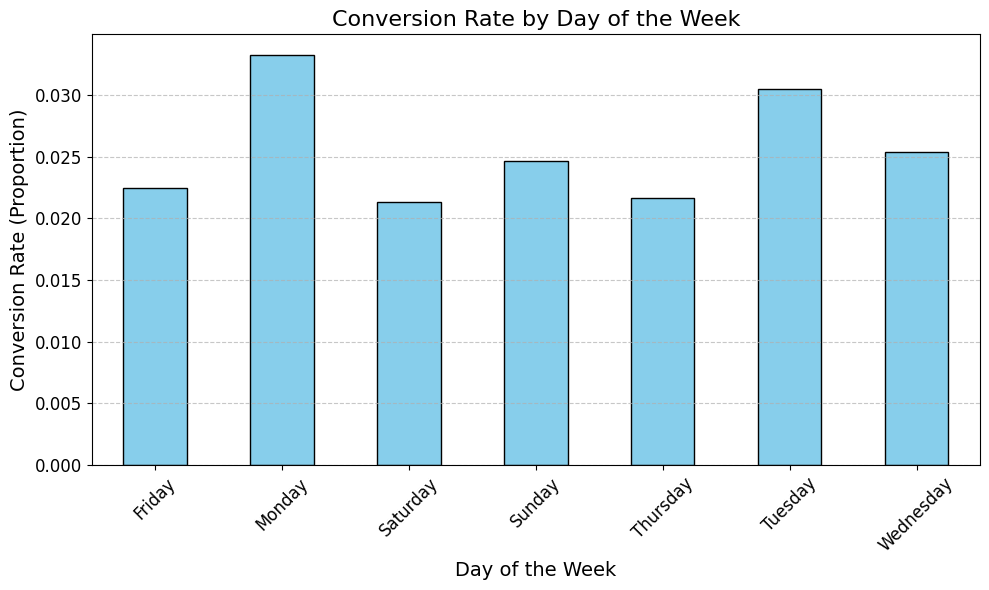

In [22]:
import matplotlib.pyplot as plt

# 요일별 전환율 계산
conversion_rate = df.groupby('most ads day')['converted'].mean()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
conversion_rate.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 스타일 설정
plt.title('Conversion Rate by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Conversion Rate (Proportion)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()